In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os, glob

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import Callback, EarlyStopping


In [5]:
file_path = 'train'

In [6]:
name_class = os.listdir(file_path)
name_class

['.DS_Store', 'malignant', 'benign']

In [51]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [52]:
filepaths

['train/malignant/melanoma_7039.jpg',
 'train/malignant/melanoma_9014.jpg',
 'train/malignant/melanoma_6327.jpg',
 'train/malignant/melanoma_5148.jpg',
 'train/malignant/melanoma_6441.jpg',
 'train/malignant/melanoma_7987.jpg',
 'train/malignant/melanoma_6455.jpg',
 'train/malignant/melanoma_7993.jpg',
 'train/malignant/melanoma_8478.jpg',
 'train/malignant/melanoma_9000.jpg',
 'train/malignant/melanoma_6333.jpg',
 'train/malignant/melanoma_5612.jpg',
 'train/malignant/melanoma_7005.jpg',
 'train/malignant/melanoma_8336.jpg',
 'train/malignant/melanoma_9028.jpg',
 'train/malignant/melanoma_7763.jpg',
 'train/malignant/melanoma_8450.jpg',
 'train/malignant/melanoma_5174.jpg',
 'train/malignant/melanoma_5160.jpg',
 'train/malignant/melanoma_6469.jpg',
 'train/malignant/melanoma_7777.jpg',
 'train/malignant/melanoma_8444.jpg',
 'train/malignant/melanoma_7011.jpg',
 'train/malignant/melanoma_8322.jpg',
 'train/malignant/melanoma_5606.jpg',
 'train/malignant/melanoma_5835.jpg',
 'train/mali

In [53]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'mali

In [54]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)

In [55]:
data.head(5)

,Filepath,Label
0,train/malignant/melanoma_7068.jpg,malignant
1,train/malignant/melanoma_9491.jpg,malignant
2,train/benign/melanoma_4338.jpg,benign
3,train/malignant/melanoma_6758.jpg,malignant
4,train/malignant/melanoma_8205.jpg,malignant


<Axes: xlabel='Label', ylabel='count'>

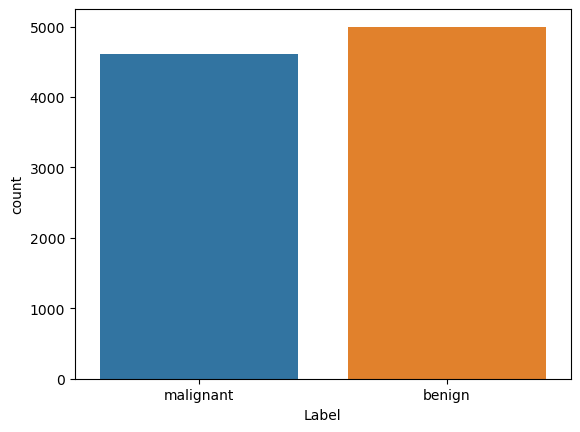

In [56]:
sns.countplot(x=data['Label'])

In [57]:
data['Label'].value_counts()

benign       4998
malignant    4604
Name: Label, dtype: int64

In [58]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

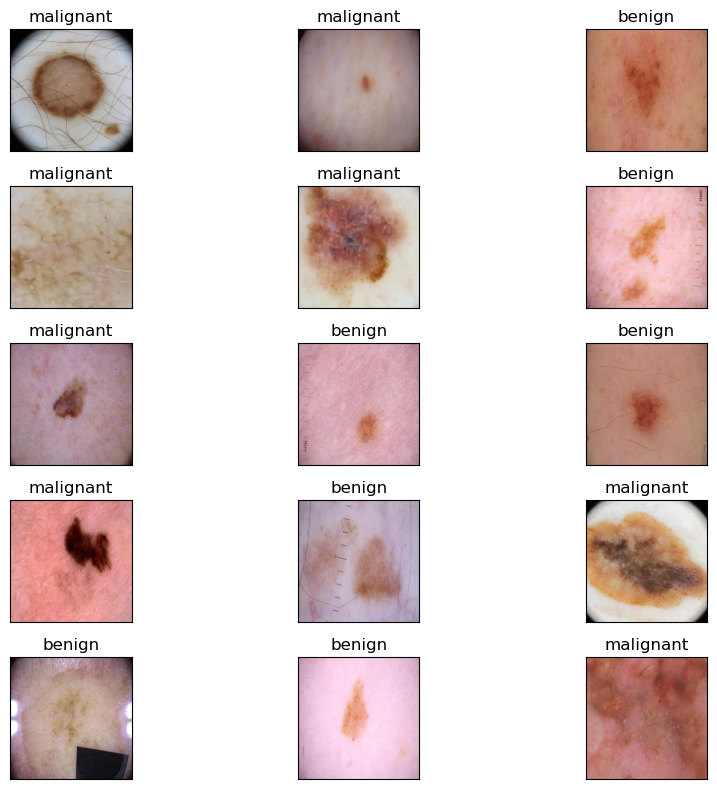

In [59]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
    
plt.tight_layout()
plt.show()

In [60]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [61]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle= True,
    seed = 42
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle= True,
    seed = 42
)


test_gen = test_datagen.flow_from_dataframe(
    dataframe=train,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle= True,
    seed = 42
)

Found 7201 validated image filenames belonging to 2 classes.
Found 2401 validated image filenames belonging to 2 classes.
Found 7201 validated image filenames belonging to 2 classes.


In [62]:
pretrained_model = ResNet50(
    input_shape = (100, 100, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'avg'


)
pretrained_model.trainable = False

In [63]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [64]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']

)

In [65]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                             patience=2,
                             mode='auto')]

In [67]:
history = model.fit(train_gen, 
                   validation_data=valid_gen,
                   epochs=15)


Epoch 1/15


2023-09-13 01:30:55.907489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


226/226 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.9072

2023-09-13 01:31:52.326329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


226/226 [==============================] - 76s 335ms/step - loss: 0.2307 - accuracy: 0.9072 - val_loss: 0.2035 - val_accuracy: 0.9250
Epoch 2/15
226/226 [==============================] - 76s 337ms/step - loss: 0.1887 - accuracy: 0.9228 - val_loss: 0.1873 - val_accuracy: 0.9267
Epoch 3/15
226/226 [==============================] - 78s 346ms/step - loss: 0.1630 - accuracy: 0.9310 - val_loss: 0.2169 - val_accuracy: 0.9092
Epoch 4/15
226/226 [==============================] - 80s 356ms/step - loss: 0.1491 - accuracy: 0.9392 - val_loss: 0.1985 - val_accuracy: 0.9275
Epoch 5/15
226/226 [==============================] - 83s 366ms/step - loss: 0.1321 - accuracy: 0.9474 - val_loss: 0.2051 - val_accuracy: 0.9254
Epoch 6/15
226/226 [==============================] - 82s 363ms/step - loss: 0.1094 - accuracy: 0.9570 - val_loss: 0.2182 - val_accuracy: 0.9259
Epoch 7/15
226/226 [==============================] - 81s 359ms/step - loss: 0.0953 - accuracy: 0.9624 - val_loss: 0.2423 - val_accuracy: 0.9

In [68]:
model.save("model_melanoma")

INFO:tensorflow:Assets written to: model_melanoma/assets


INFO:tensorflow:Assets written to: model_melanoma/assets


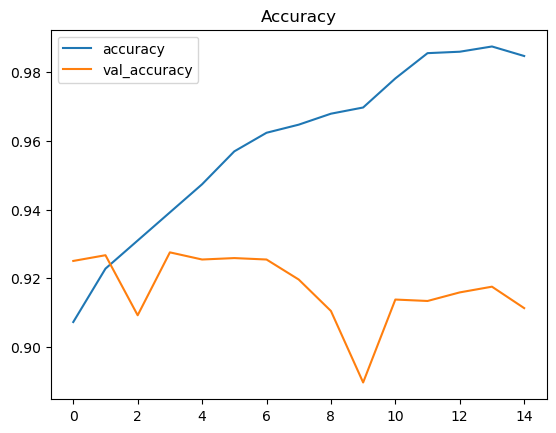

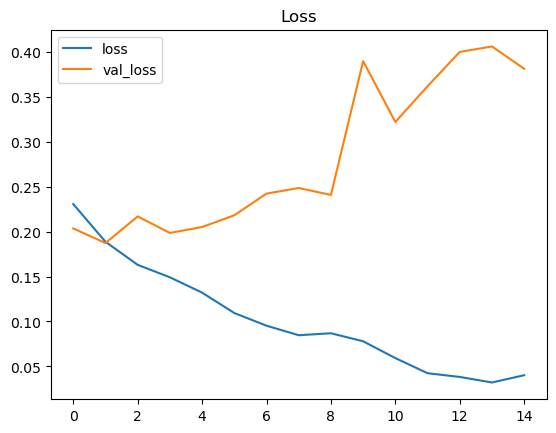

In [69]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.show()

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.show()

In [70]:
results = model.evaluate(test_gen, verbose=0)
print(f" Test Loss: {results[0]}")
print(f" Test Accuracy: {results[1]*100}")

2023-09-13 01:51:13.111122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 Test Loss: 0.032320279628038406
 Test Accuracy: 98.91681671142578


In [71]:
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)

labels = (train_gen.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]

2023-09-13 01:52:10.648576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


226/226 [==============================] - 55s 241ms/step


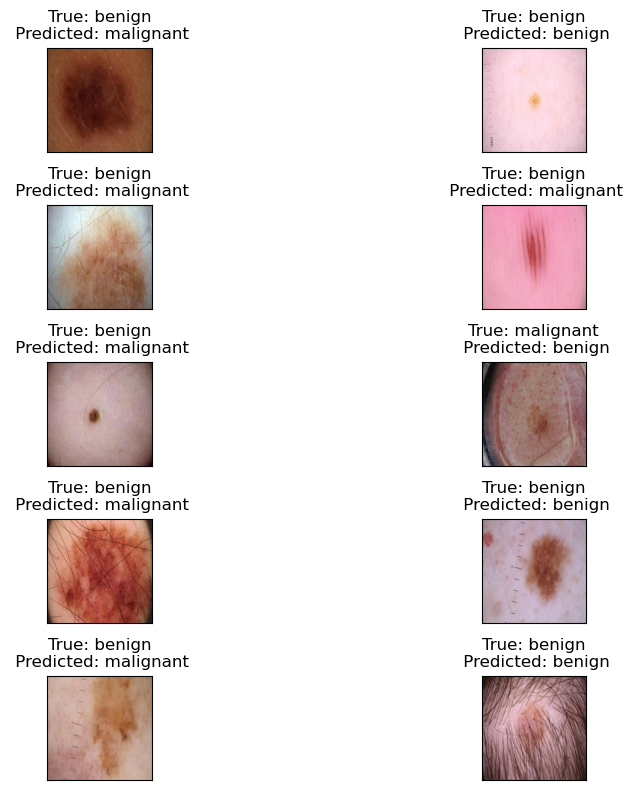

In [73]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\n Predicted: {pred[i]}")
    
plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model_melanoma")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

1/1 [==============================] - 0s 65ms/step
[[ 0 99]]
Melanoma in Malignant state


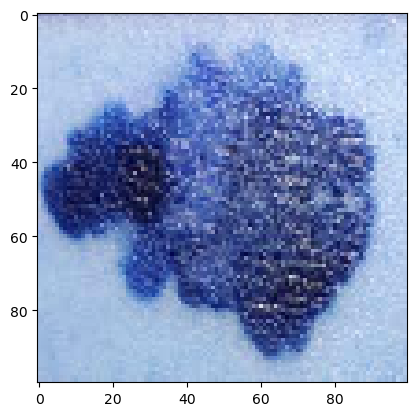

In [27]:
import cv2
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'download.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model.predict(x)
new_list = (result*100).astype('int')
# new_list = ['benignant', 'malignant']
x = "melanoma"
print(new_list)
if new_list[0][0] >= new_list[0][1]:
    print("Melanoma in Benign state")
else:
    print("Melanoma in Malignant state")

plt.imshow(img)

In [16]:
x = 'melanoma'

In [82]:
new_list = ['benignant', 'malignant']

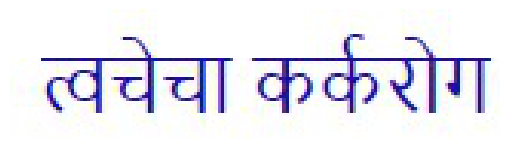

In [28]:
Regional_name = {'melanoma':'/Users/tanish/Desktop/__/untitled folder/melanoma.jpg',
                 'scabie':'/Users/tanish/Desktop/__/untitled folder/Scabie.jpg',
                'eczema':'/Users/tanish/Desktop/__/untitled folder/Eczema.jpg'
                }

import matplotlib.pyplot as plt
from PIL import Image

def display_disease_image(disease_name):
    if disease_name in Regional_name:
        img_path = Regional_name[disease_name]
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off') 
        plt.show()

display_disease_image(x)
